In [1]:
#manual transformation on the basis of skewness
import pandas as pd 
train=pd.read_csv("train_new.csv")
train.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [71]:
features=train.columns[0:11]
features

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1'],
      dtype='object')

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


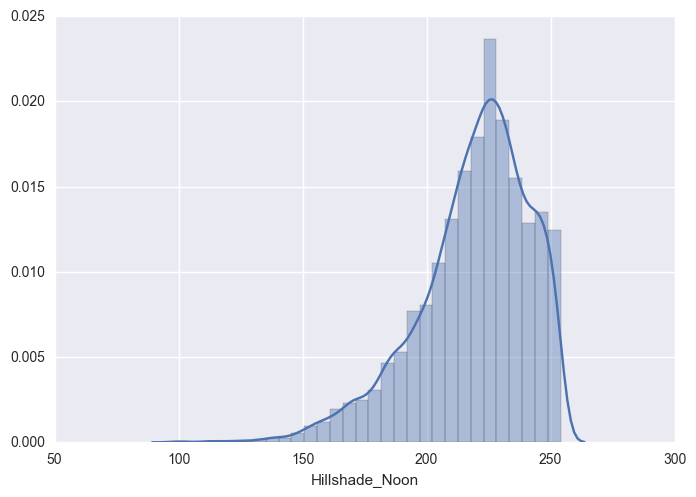

In [8]:
#lets first do left skewed - Hillshade_Noon and Hillshade_9am
sns.distplot(train['Hillshade_Noon'],bins=30)
plt.show()


In [11]:
max(train['Hillshade_Noon'])

254

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


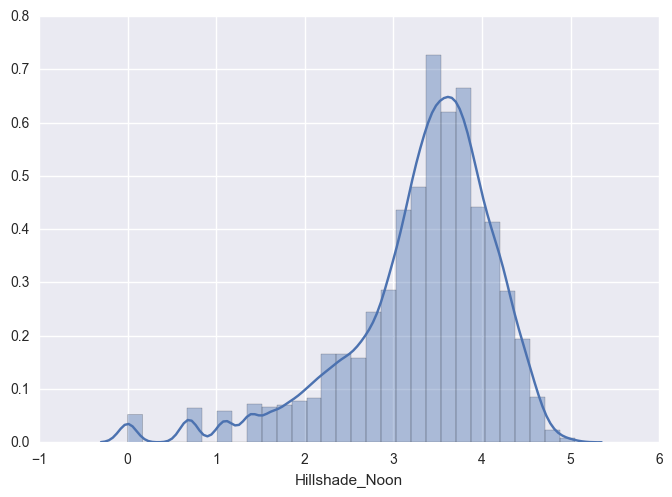

In [19]:
sns.distplot(np.log(255-train['Hillshade_Noon']),bins=30)
plt.show()
#looks like a normal distribution


In [44]:
train['Hillshade_Noon']=np.log(255-train['Hillshade_Noon'])

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


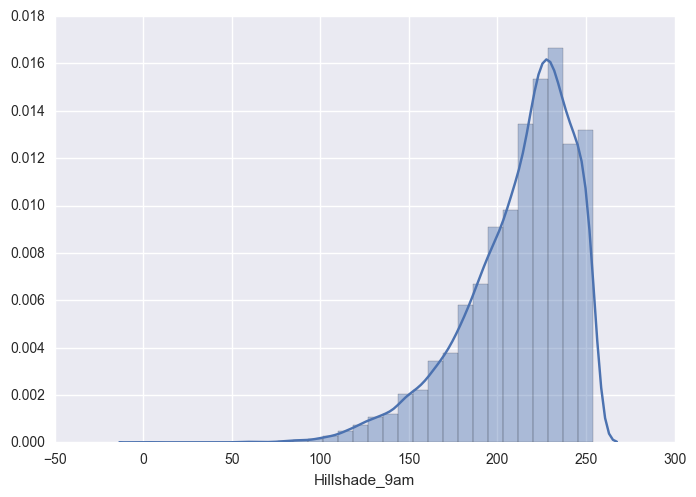

In [15]:
sns.distplot(train['Hillshade_9am'],bins=30)
plt.show()


In [16]:
max(train['Hillshade_9am'])

254

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


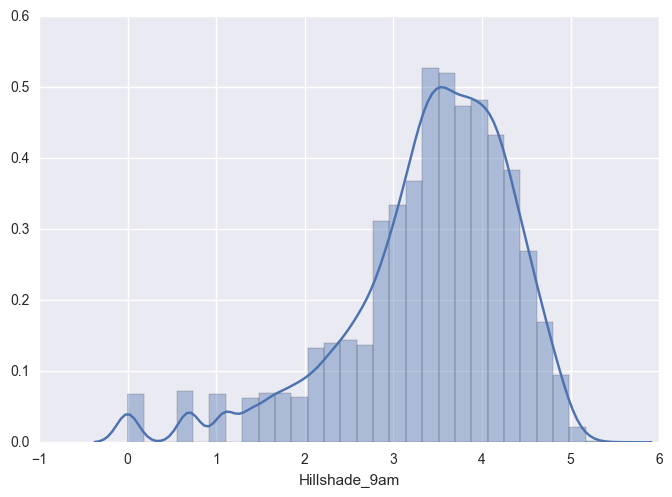

In [45]:
sns.distplot(np.log(255-train['Hillshade_9am']),bins=30)
plt.show()


In [46]:
train['Hillshade_9am']=np.log(255-train['Hillshade_9am'])

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


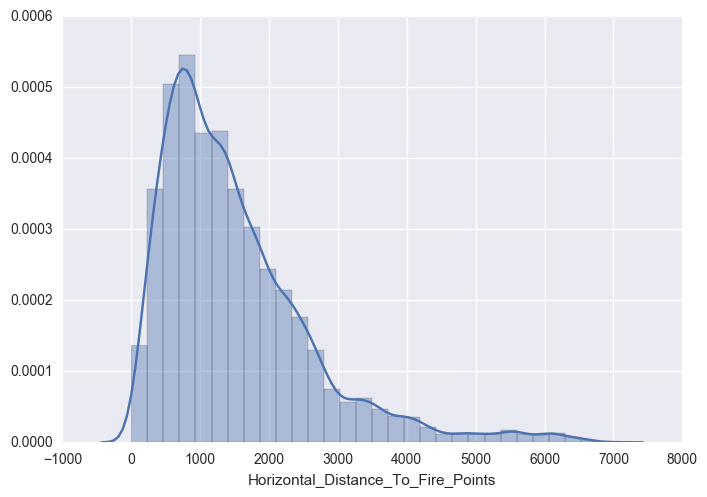

In [20]:
#lets go for right skewed data - slope*, horizontal distance to hydrology*, vertical distance to hydrology*, horizontal distance to 
#roadways, horizontal distance to fire points
sns.distplot(train['Horizontal_Distance_To_Fire_Points'],bins=30)
plt.show()


C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


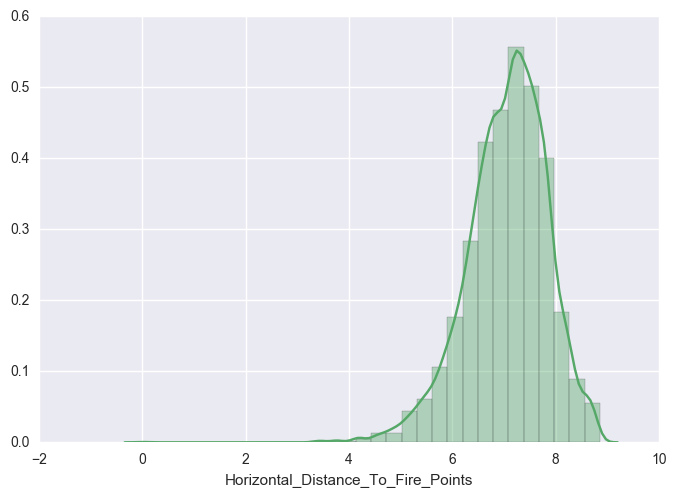

In [22]:
sns.distplot(np.log(train['Horizontal_Distance_To_Fire_Points']+1),bins=30)
plt.show()
# good normal distribution


In [47]:
train['Horizontal_Distance_To_Roadways']=np.log(train['Horizontal_Distance_To_Roadways']+1)

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


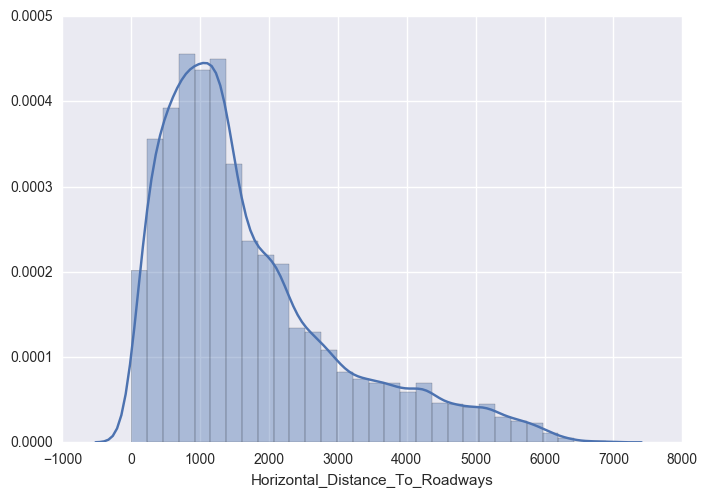

In [23]:
sns.distplot(train['Horizontal_Distance_To_Roadways'],bins=30)
plt.show()

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


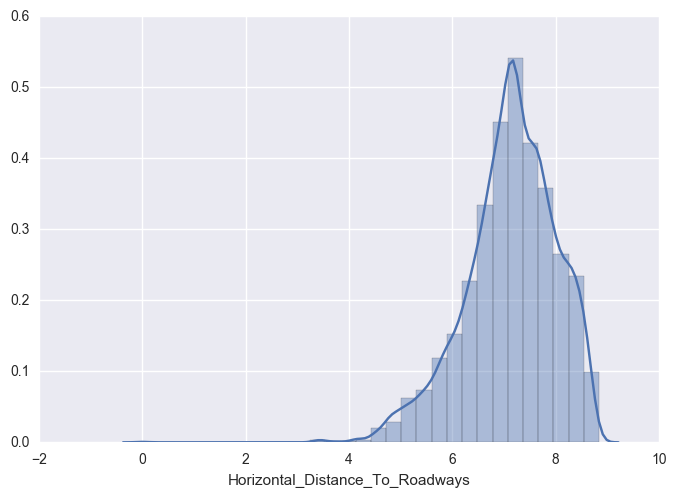

In [28]:
sns.distplot(np.log(train['Horizontal_Distance_To_Roadways']+1),bins=30)
plt.show()


In [48]:
train['Horizontal_Distance_To_Fire_Points']=np.log(train['Horizontal_Distance_To_Fire_Points']+1)

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


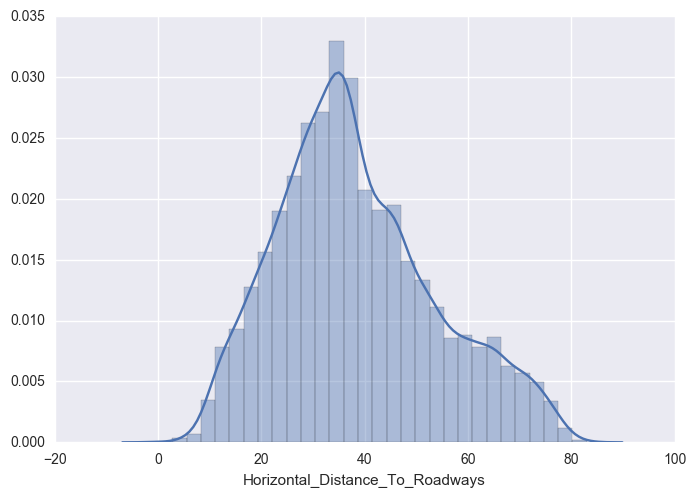

In [29]:
sns.distplot((train['Horizontal_Distance_To_Roadways'])**(1/2),bins=30)
plt.show()
#it looks more symmetric but it ranges from 0 to 80 while log transformation rnages from 0-9 which is in range with all others

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


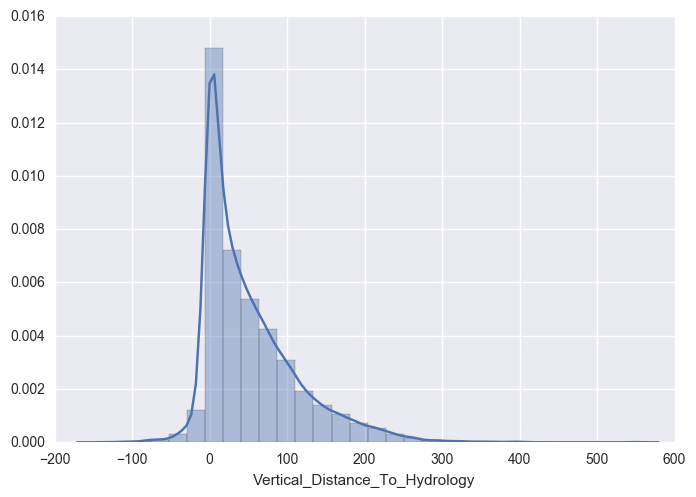

In [30]:
sns.distplot(train['Vertical_Distance_To_Hydrology'],bins=30)
plt.show()
#lot of zero values cannot be used for inverse function


C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


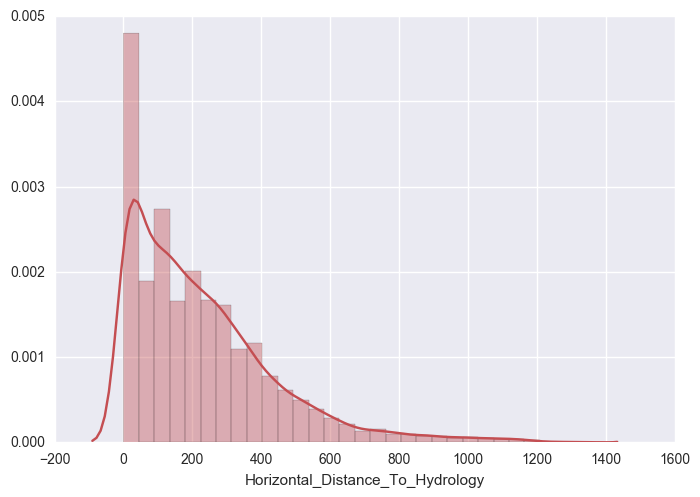

In [33]:
sns.distplot(train['Horizontal_Distance_To_Hydrology'],bins=30)
plt.show()
#inverse would have been better but lot of zero are there
#taking log is not a good distribution 
#sqrt,cube root, 1/(x+1) is also not a good distribution



C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


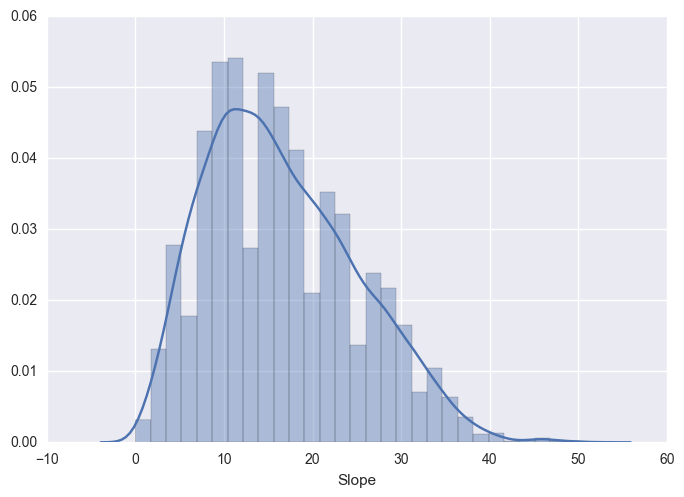

In [38]:
sns.distplot(train['Slope'],bins=30)
plt.show()
#sqrt works perfect 

In [49]:
train['Slope']=train['Slope']**(1/2)

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


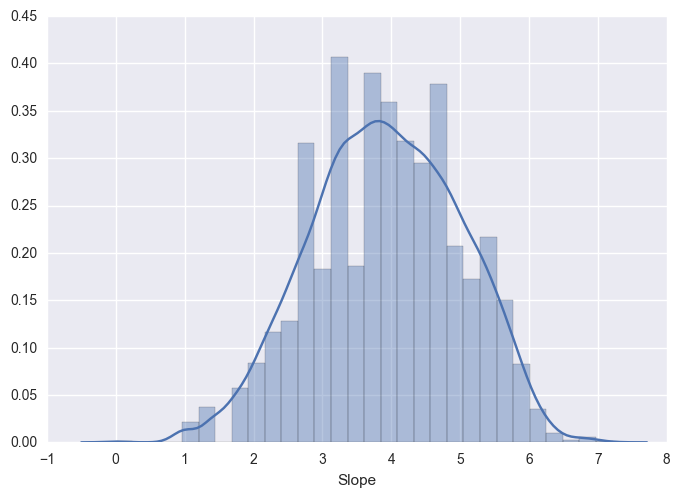

In [39]:
sns.distplot((train['Slope'])**(1/2),bins=30)
plt.show()

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


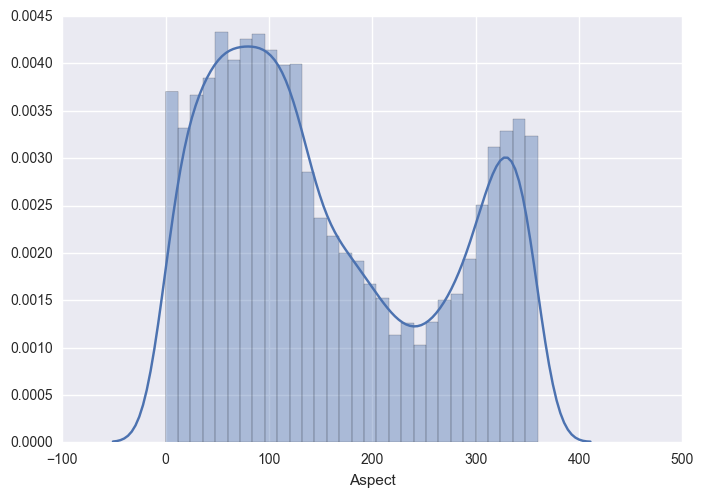

In [40]:
#aspect
sns.distplot(train['Aspect'],bins=30)
plt.show()
#no good transformation comes in mind
#not much but sqrt transformation looks better

C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


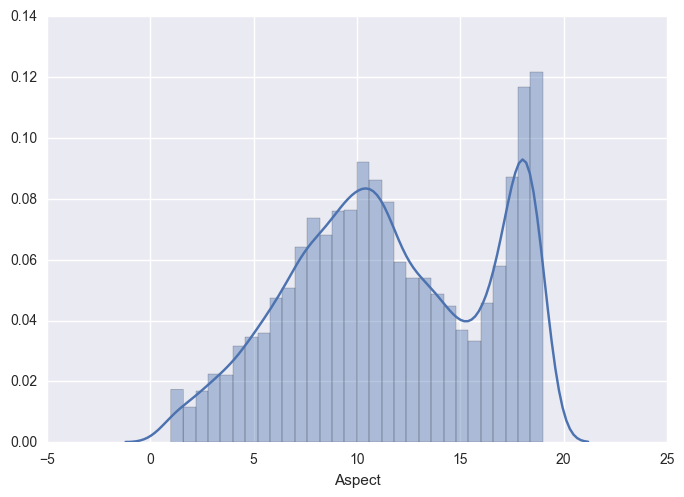

In [43]:
sns.distplot((train['Aspect']+1)**(1/2),bins=30)
plt.show()


In [50]:
train['Aspect']=train['Aspect']**(1/2)

In [51]:
train.head()
#Elevation is to be scaled
#horizontal distnace to hydrology (no good transformation ) so only scaling
#Vertical distance to hydrology (no good transformation ) so only scaling
#Hillshade 3pm can be scaled distribution is symmetric


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,7.141428,1.732051,258,0,6.236370,3.526361,3.135494,148,8.745125,...,0,0,0,0,0,0,0,0,0,5
1,2590,7.483315,1.414214,212,-6,5.968708,3.555348,2.995732,151,8.736489,...,0,0,0,0,0,0,0,0,0,5
2,2804,11.789826,3.000000,268,65,8.064951,3.044522,2.833213,135,8.719644,...,0,0,0,0,0,0,0,0,0,2
3,2785,12.449900,4.242641,242,118,8.036250,2.833213,2.833213,122,8.734238,...,0,0,0,0,0,0,0,0,0,2
4,2595,6.708204,1.414214,153,-1,5.971262,3.555348,3.044522,150,8.727940,...,0,0,0,0,0,0,0,0,0,5


In [56]:
m=np.mean(train['Elevation'])
s=np.std(train['Elevation'])
train['Elevation']=(train['Elevation']-m)/s

In [59]:
m=np.mean(train['Hillshade_3pm'])
s=np.std(train['Hillshade_3pm'])
train['Hillshade_3pm']=(train['Hillshade_3pm']-m)/s

In [60]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-0.367095,7.141428,1.732051,258,0,6.236370,3.526361,3.135494,0.281259,8.745125,...,0,0,0,0,0,0,0,0,0,5
1,-0.381461,7.483315,1.414214,212,-6,5.968708,3.555348,2.995732,0.346627,8.736489,...,0,0,0,0,0,0,0,0,0,5
2,0.130912,11.789826,3.000000,268,65,8.064951,3.044522,2.833213,-0.002005,8.719644,...,0,0,0,0,0,0,0,0,0,2
3,0.085421,12.449900,4.242641,242,118,8.036250,2.833213,2.833213,-0.285268,8.734238,...,0,0,0,0,0,0,0,0,0,2
4,-0.369489,6.708204,1.414214,153,-1,5.971262,3.555348,3.044522,0.324838,8.727940,...,0,0,0,0,0,0,0,0,0,5


In [69]:
#Distance to hydrology is dropped for right now because no good transformation is there
train_manualt=train.ix[:,0:3]
train_manualt=pd.concat([train_manualt,train.ix[:,5:10]],axis=1)

In [70]:
train_manualt.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-0.367095,7.141428,1.732051,6.236370,3.526361,3.135494,0.281259,8.745125
1,-0.381461,7.483315,1.414214,5.968708,3.555348,2.995732,0.346627,8.736489
2,0.130912,11.789826,3.000000,8.064951,3.044522,2.833213,-0.002005,8.719644
3,0.085421,12.449900,4.242641,8.036250,2.833213,2.833213,-0.285268,8.734238
4,-0.369489,6.708204,1.414214,5.971262,3.555348,3.044522,0.324838,8.727940


In [72]:
ntrain=pd.read_csv("ntrain.csv")

In [73]:
ntrain.head()

,Wilderness_Area,Soil_Type,Cover_Type
0,0,29,5
1,0,29,5
2,0,12,2
3,0,30,2
4,0,29,5


In [74]:
train_manualt=pd.concat([train_manualt,ntrain.ix[:,0:2]],axis=1)

In [75]:
train_manualt.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
0,-0.367095,7.141428,1.732051,6.236370,3.526361,3.135494,0.281259,8.745125,0,29
1,-0.381461,7.483315,1.414214,5.968708,3.555348,2.995732,0.346627,8.736489,0,29
2,0.130912,11.789826,3.000000,8.064951,3.044522,2.833213,-0.002005,8.719644,0,12
3,0.085421,12.449900,4.242641,8.036250,2.833213,2.833213,-0.285268,8.734238,0,30
4,-0.369489,6.708204,1.414214,5.971262,3.555348,3.044522,0.324838,8.727940,0,29


In [76]:
train_manualt.to_csv("train_manualtransformation.csv",index=False)